<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_1_6)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.6_n250.csv',
 'data_multi_delta_-1.6_n120.csv',
 'data_multi_delta_-1.6_n60.csv',
 'data_multi_delta_-1.6_n30.csv',
 'data_multi_delta_-1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.6_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,33.287001,86.462913,69.165033,0.044486,198.959432,198.918405,0.041027
1,0.0,1.0,57.558742,88.014696,51.278318,-0.016917,206.834839,206.857754,-0.022914
2,0.0,2.0,39.606079,73.348759,80.209022,0.040947,203.204807,203.167940,0.036867
3,0.0,3.0,38.916159,24.730199,60.352173,-0.103317,133.895215,133.997709,-0.102494
4,0.0,4.0,37.092860,95.908215,20.677740,-0.015677,163.663138,163.680562,-0.017424
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,45.177472,48.630768,71.114508,0.010335,174.933083,174.920629,0.012454
59996,999.0,56.0,31.634333,35.107405,58.884568,-0.075236,135.551069,135.615223,-0.064154
59997,999.0,57.0,62.721213,50.781429,69.133858,-0.065275,192.571225,192.631138,-0.059912
59998,999.0,58.0,38.903670,75.216790,49.298571,-0.020154,173.398877,173.417566,-0.018689


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,33.287001,86.462913,69.165033,0.044486,198.959432,198.918405,0.041027
1,0.0,1.0,57.558742,88.014696,51.278318,-0.016917,206.834839,206.857754,-0.022914
2,0.0,2.0,39.606079,73.348759,80.209022,0.040947,203.204807,203.167940,0.036867
3,0.0,3.0,38.916159,24.730199,60.352173,-0.103317,133.895215,133.997709,-0.102494
4,0.0,4.0,37.092860,95.908215,20.677740,-0.015677,163.663138,163.680562,-0.017424
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,45.177472,48.630768,71.114508,0.010335,174.933083,174.920629,0.012454
59996,999.0,56.0,31.634333,35.107405,58.884568,-0.075236,135.551069,135.615223,-0.064154
59997,999.0,57.0,62.721213,50.781429,69.133858,-0.065275,192.571225,192.631138,-0.059912
59998,999.0,58.0,38.903670,75.216790,49.298571,-0.020154,173.398877,173.417566,-0.018689


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    33.287001  86.462913  69.165033  ...  198.959432  198.918405  0.041027
      1.0    57.558742  88.014696  51.278318  ...  206.834839  206.857754 -0.022914
      2.0    39.606079  73.348759  80.209022  ...  203.204807  203.167940  0.036867
      3.0    38.916159  24.730199  60.352173  ...  133.895215  133.997709 -0.102494
      4.0    37.092860  95.908215  20.677740  ...  163.663138  163.680562 -0.017424
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   45.177472  48.630768  71.114508  ...  174.933083  174.920629  0.012454
      56.0   31.634333  35.107405  58.884568  ...  135.551069  135.615223 -0.064154
      57.0   62.721213  50.781429  69.133858  ...  192.571225  192.631138 -0.059912
      58.0   38.903670  75.216790  49.298571  ...  173.398877  173.417566 -0.018689
      59.0   33.440688  29.477379  33.840325  ...  106.723317  106.732350 -0.009033

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    33.287001  86.462913  69.165033  ...  198.959432  198.918405  0.041027
      1.0    57.558742  88.014696  51.278318  ...  206.834839  206.857754 -0.022914
      2.0    39.606079  73.348759  80.209022  ...  203.204807  203.167940  0.036867
      3.0    38.916159  24.730199  60.352173  ...  133.895215  133.997709 -0.102494
      4.0    37.092860  95.908215  20.677740  ...  163.663138  163.680562 -0.017424
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   45.177472  48.630768  71.114508  ...  174.933083  174.920629  0.012454
      56.0   31.634333  35.107405  58.884568  ...  135.551069  135.615223 -0.064154
      57.0   62.721213  50.781429  69.133858  ...  192.571225  192.631138 -0.059912
      58.0   38.903670  75.216790  49.298571  ...  173.398877  173.417566 -0.018689
      59.0   33.440688  29.477379  33.840325  ...  106.723317  106.732350 -0.009033

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,33.287001,86.462913,69.165033,0.044486,198.959432,198.918405,0.041027
1,0.0,1.0,57.558742,88.014696,51.278318,-0.016917,206.834839,206.857754,-0.022914
2,0.0,2.0,39.606079,73.348759,80.209022,0.040947,203.204807,203.167940,0.036867
3,0.0,3.0,38.916159,24.730199,60.352173,-0.103317,133.895215,133.997709,-0.102494
4,0.0,4.0,37.092860,95.908215,20.677740,-0.015677,163.663138,163.680562,-0.017424
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,45.177472,48.630768,71.114508,0.010335,174.933083,174.920629,0.012454
59996,999.0,56.0,31.634333,35.107405,58.884568,-0.075236,135.551069,135.615223,-0.064154
59997,999.0,57.0,62.721213,50.781429,69.133858,-0.065275,192.571225,192.631138,-0.059912
59998,999.0,58.0,38.903670,75.216790,49.298571,-0.020154,173.398877,173.417566,-0.018689


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    33.287001  86.462913  69.165033  ...  198.959432  198.918405  0.041027
      1.0    57.558742  88.014696  51.278318  ...  206.834839  206.857754 -0.022914
      2.0    39.606079  73.348759  80.209022  ...  203.204807  203.167940  0.036867
      3.0    38.916159  24.730199  60.352173  ...  133.895215  133.997709 -0.102494
      4.0    37.092860  95.908215  20.677740  ...  163.663138  163.680562 -0.017424
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   45.177472  48.630768  71.114508  ...  174.933083  174.920629  0.012454
      56.0   31.634333  35.107405  58.884568  ...  135.551069  135.615223 -0.064154
      57.0   62.721213  50.781429  69.133858  ...  192.571225  192.631138 -0.059912
      58.0   38.903670  75.216790  49.298571  ...  173.398877  173.417566 -0.018689
      59.0   33.440688  29.477379  33.840325  ...  106.723317  106.732350 -0.009033

[60000 rows x 7 columns]

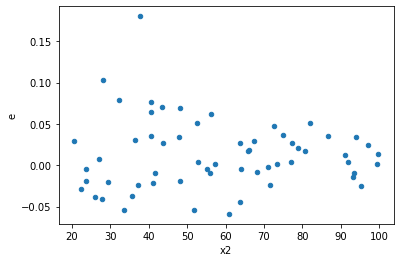

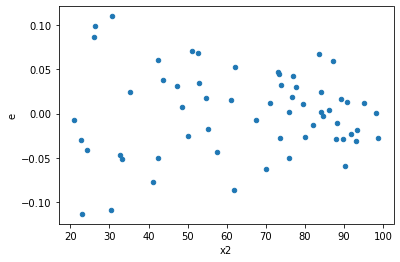

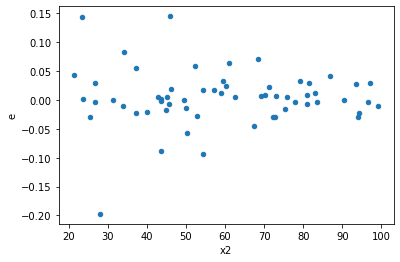

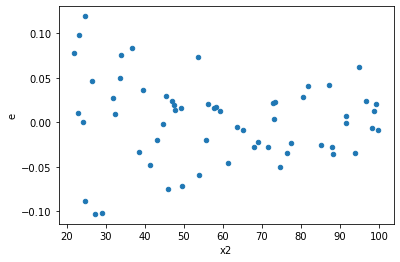

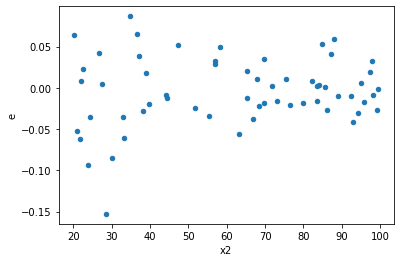

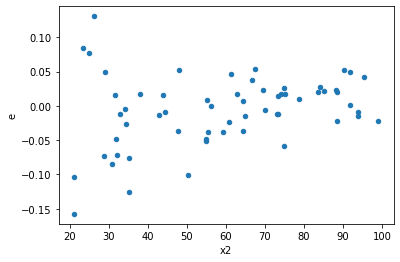

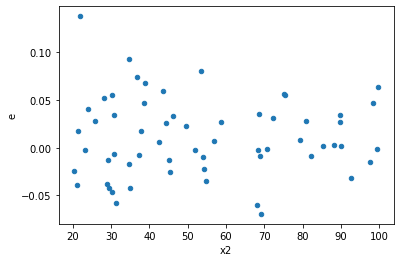

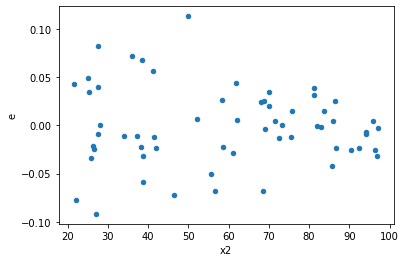

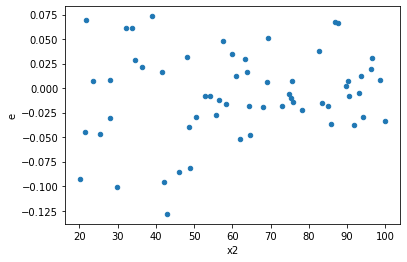

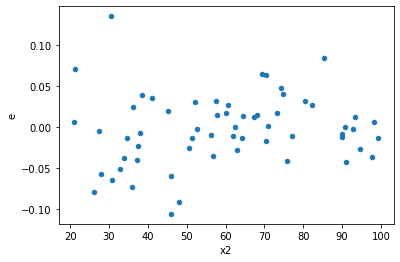

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,0.08132071041879546,0.012772862010891431,0.003872414781847403,0.0006082315243281634,0.1570677622602184,8.087259669354174e-05,Reject005=0 : Heteroscedasticity
1.0,21.0,21.0,0.06218071280457999,0.008554861825813897,0.0029609863240276186,0.00040737437265780463,0.1375806329641139,2.777864767873331e-05,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,0.09996978421521144,0.015581612387384043,0.004760465915010069,0.000741981542256383,0.15586321916870896,7.60804328096236e-05,Reject005=0 : Heteroscedasticity
3.0,21.0,21.0,0.06419690686301703,0.01386868821857967,0.0030569955649055727,0.00066041372469427,0.21603358940910647,0.0008973809611502198,Reject005=0 : Heteroscedasticity
4.0,21.0,21.0,0.05287221095069835,0.007870168529472154,0.002517724330985636,0.0003747699299748645,0.14885264655966127,5.266523149096544e-05,Reject005=0 : Heteroscedasticity
5.0,21.0,21.0,0.06192282989788584,0.01525086236007154,0.0029487061856136114,0.0007262315409557877,0.24628820073664356,0.0022359682669768097,Reject005=0 : Heteroscedasticity
6.0,21.0,21.0,0.05317584485703543,0.025742029121753978,0.0025321830884302587,0.0012258109105597133,0.4840925271796256,0.10409163891582351,Reject005=1 : Homoscedasticity
7.0,21.0,21.0,0.07905205922945054,0.013045819917066907,0.003764383772830978,0.0006212295198603289,0.16502821108304205,0.00011934546538458345,Reject005=0 : Heteroscedasticity
8.0,21.0,21.0,0.07171322976726903,0.023056942735601344,0.003414915703203287,0.0010979496540762545,0.32151588779961593,0.012223230995608717,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    860
Reject005=1 : Homoscedasticity      140
Name: Result_test, dtype: int64